### SUPPORT VECTOR MACHINES

##### BINARY CLASSIFICATION

In [ ]:
import pandas as pd
df=pd.read_csv("fitness_dataset.csv")

In [ ]:
df

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,NaN,1.54,3.25,1,M,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,no,M,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,yes,M,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,F,0


In [ ]:
df.isnull().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,160
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [ ]:
df['sleep_hours']=df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [ ]:
df.isnull().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,0
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='O')

,smokes,gender
count,2000,2000
unique,4,2
top,yes,F
freq,711,1030


In [ ]:
df['gender'].value_counts()

,count
gender,
F,1030
M,970


In [ ]:
df['smokes'].value_counts()

,count
smokes,
0,1099
1,901


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])


In [ ]:
df['smokes']=df['smokes'].map({'0':0,'no':0,'1':1,'yes':1})

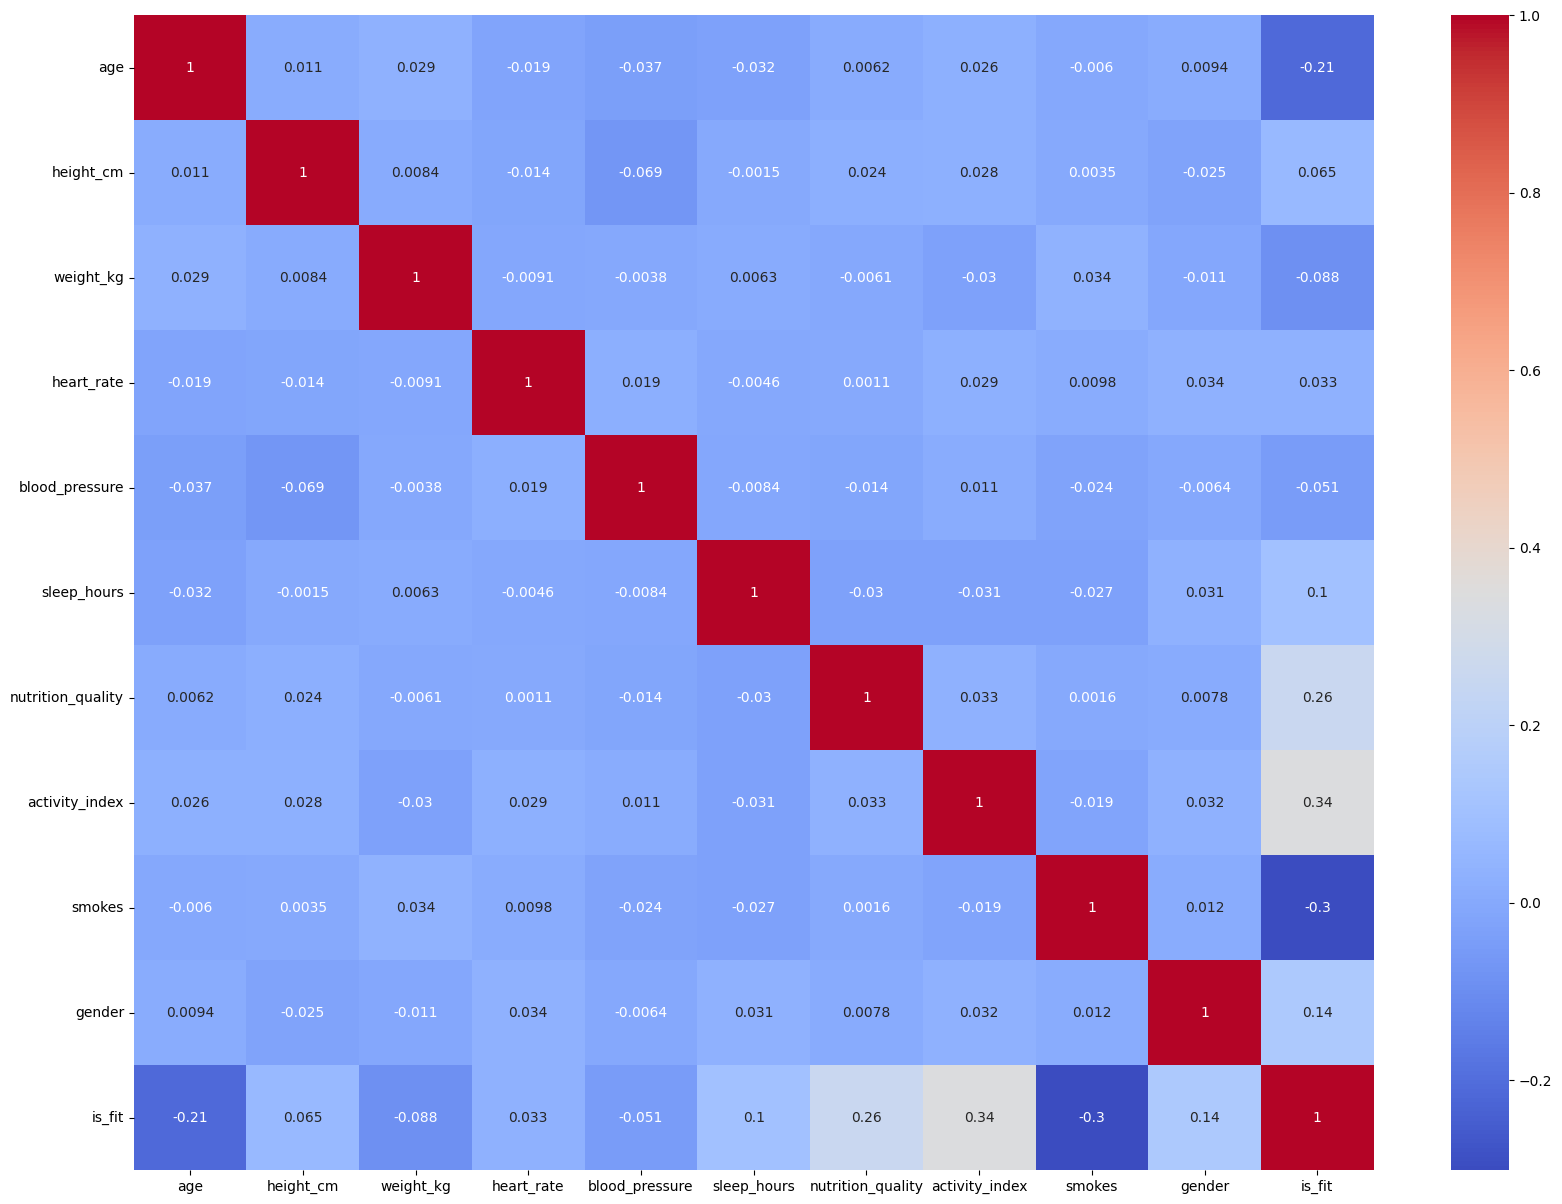

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kg'}>],
       [<Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'nutrition_quality'}>,
        <Axes: title={'center': 'activity_index'}>,
        <Axes: title={'center': 'smokes'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'is_fit'}>, <Axes: >]], dtype=object)

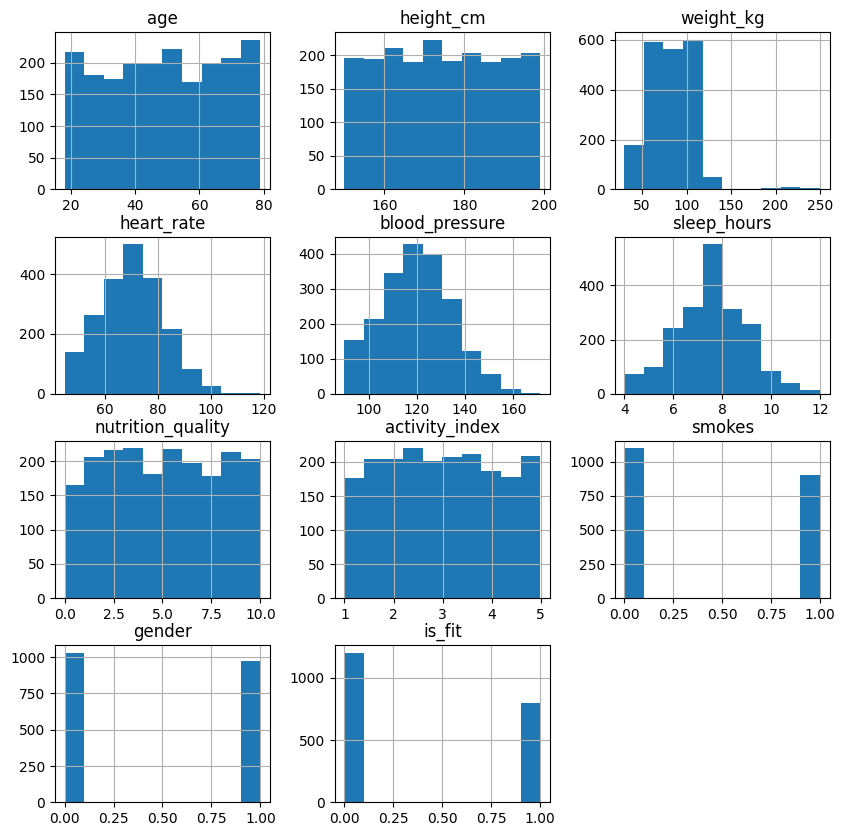

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.svm import SVC

In [ ]:
X= df.drop('is_fit',axis=1)
y=df['is_fit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

BEST PARAMETERS: {'kernel': 'linear', 'gamma': 0.01, 'degree': 4, 'C': 10}

In [ ]:
model=SVC(kernel='rbf',C=10,gamma=0.01,probability=True)

In [ ]:
model.fit(x_train,y_train)

SVC(C=10, gamma=0.01, probability=True)

In [ ]:
ypred=model.predict(x_test)

In [ ]:
print("ACCURACY :",accuracy_score(y_test,ypred))
print("PRECISION:",precision_score(y_test,ypred))
print("RECALL:",recall_score(y_test,ypred))

ACCURACY : 0.7675
PRECISION: 0.7432432432432432
RECALL: 0.6666666666666666


In [ ]:
ypred_proba=model.predict_proba(x_test)[:,1]

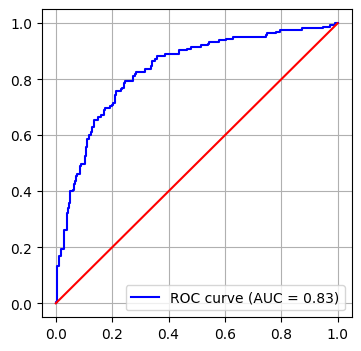

In [ ]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,ypred_proba)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(4,4))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid={
    'C':[0.01,0.1,1,2,10],
    'kernel':['linear','rbf','poly'],
    'degree':[3,4,5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}


random_svmmodel=RandomizedSearchCV(SVC(random_state=42),param_grid,cv=3,scoring='accuracy',n_iter=30)

In [ ]:
random_svmmodel.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=30,
                   param_distributions={'C': [0.01, 0.1, 1, 2, 10],
                                        'degree': [3, 4, 5],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [ ]:
print("BEST PARAMETERS:",random_svmmodel.best_params_)
print("BEST SCORE:",random_svmmodel.best_score_)

BEST PARAMETERS: {'kernel': 'linear', 'gamma': 0.01, 'degree': 5, 'C': 1}
BEST SCORE: 0.8037420391489999


In [ ]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,7.513315,2.37,3.97,0,0,1
1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0,0,1
2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0,0,0
3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0,1,1
4,60,175,99,58.1,115.8,8.000000,9.95,4.83,1,0,1


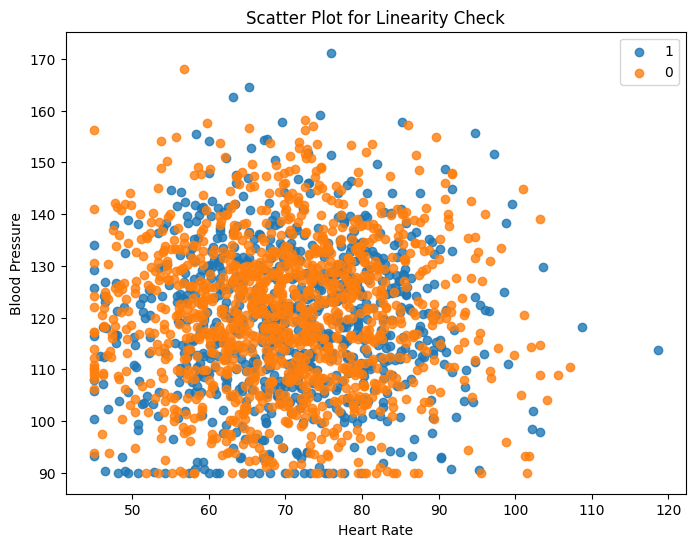

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for label in df['is_fit'].unique():
    subset = df[df['is_fit'] == label]
    plt.scatter(subset['heart_rate'], subset['blood_pressure'], label=label, alpha=0.8)

plt.xlabel("Heart Rate")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot for Linearity Check")
plt.legend()
plt.show()


#### MULTI-CLASSIFICATION USING SVM

In [ ]:
import pandas as pd

df=pd.read_csv("Crop_recommendation.csv")

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='O')

,label
count,2200
unique,22
top,rice
freq,100


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

In [ ]:
crop_group_map = {
    'rice': 'Cereals',
    'maize': 'Cereals',


    'lentil': 'Pulses',
    'mungbean': 'Pulses',
    'blackgram': 'Pulses',
    'kidneybeans': 'Pulses',
    'chickpea': 'Pulses',
    'pigeonpeas': 'Pulses',
    'mothbeans': 'Pulses',

    'mango': 'Fruits',
    'banana': 'Fruits',
    'grapes': 'Fruits',
    'apple': 'Fruits',
    'orange': 'Fruits',
    'pomegranate': 'Fruits',
    'papaya': 'Fruits',
    'muskmelon': 'Fruits',
    'watermelon': 'Fruits',
    'coconut': 'Fruits',

    'cotton': 'Cash Crop',
    'jute': 'Cash Crop',
    'coffee': 'Cash Crop'
}

df['crop_group'] = df['label'].map(crop_group_map)


In [ ]:
df.drop(columns=['label'], inplace=True)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Cereals
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Cereals
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Cereals
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Cereals
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Cereals


In [ ]:
df['crop_group'].value_counts()

,count
crop_group,
Fruits,1000
Pulses,700
Cash Crop,300
Cereals,200


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['crop_group']=le.fit_transform(df['crop_group'])

In [ ]:
df['crop_group'].value_counts()

,count
crop_group,
2,1000
3,700
0,300
1,200


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('crop_group', axis=1)
y = df['crop_group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=1.0,gamma=0.1)

In [ ]:
model.fit(X_train_res,y_train_res)

SVC(gamma=0.1)

In [ ]:
X_train_res

array([[-0.98203442,  2.0678001 ,  3.06357499, ...,  0.55184901,
        -0.40606772, -0.53232773],
       [-0.22196066,  0.60569649, -0.45604   , ..., -0.18558444,
         0.03637583, -0.55472355],
       [ 2.05826061, -0.21673678, -0.45604   , ...,  0.46044691,
         0.36589262, -0.78151731],
       ...,
       [-0.42442587,  0.15464222,  0.68354773, ..., -2.39452848,
         1.27395158, -0.44045363],
       [-1.29665708, -0.21710854, -0.58253969, ...,  0.62017677,
         0.61292561, -1.11167529],
       [-0.62869045,  0.45993732, -0.63612182, ..., -0.32545438,
         1.06013811, -0.70929895]])

In [ ]:
y_train_res.value_counts()

,count
crop_group,
Fruits,800
Pulses,800
Cash Crop,800
Cereals,800


In [ ]:
ypred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("accuracy:",accuracy_score(y_test,ypred))

accuracy: 0.990909090909091


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['crop_group'].unique()

array([1, 3, 2, 0])

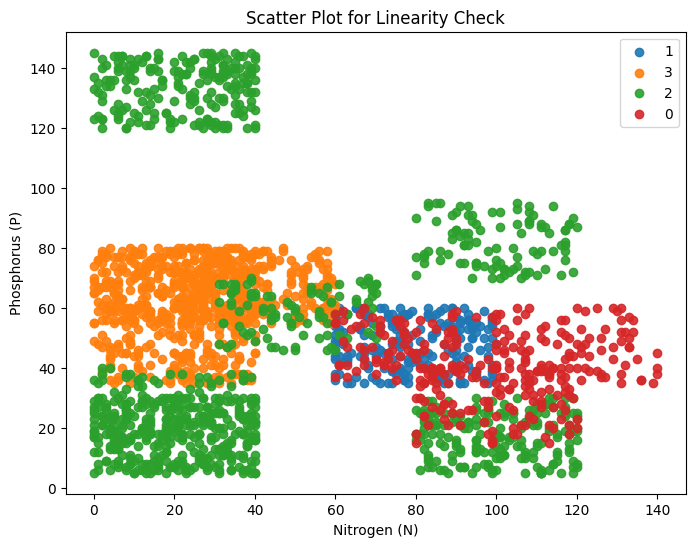

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for label in df['crop_group'].unique():
    subset = df[df['crop_group'] == label]
    plt.scatter(subset['N'], subset['P'], label=label, alpha=0.9)

plt.xlabel("Nitrogen (N)")
plt.ylabel("Phosphorus (P)")
plt.title("Scatter Plot for Linearity Check")
plt.legend()
plt.show()


# TEXT CLASSIFICATION USING SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("SPAM text message 20170820 - Data.csv")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
df['Category']=df['Category'].map({'ham':0,'spam':1})

In [ ]:
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# The vectorizer:

# Tokenizes text
# Removes stopwords (if specified)
# Applies filters (min_df, max_df, max_features)
# Builds a dictionary of tokens → feature index
# Computes IDF values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train_tfidf, y_train)

In [ ]:
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32266 stored elements and shape (4457, 5000)>
  Coords	Values
  (0, 2030)	0.6654771281826798
  (0, 805)	0.7464182419165099
  (1, 833)	0.1591838265240309
  (1, 2352)	0.3280361380846259
  (1, 4639)	0.23142730884167032
  (1, 1198)	0.3280361380846259
  (1, 3649)	0.3280361380846259
  (1, 2587)	0.14204391236439476
  (1, 1199)	0.3280361380846259
  (1, 1197)	0.3280361380846259
  (1, 3340)	0.3280361380846259
  (1, 2476)	0.3280361380846259
  (1, 2360)	0.2377194017021447
  (1, 163)	0.30192874636862543
  (2, 3569)	0.25609025967678106
  (2, 4378)	0.507987580391673
  (2, 2675)	0.44388199548032137
  (2, 4276)	0.526218117068861
  (2, 465)	0.4499218425720214
  (3, 2867)	0.625487348279019
  (3, 4964)	0.7802343091295597
  (4, 2867)	0.25638009754062085
  (4, 4480)	0.43226882195656147
  (4, 575)	0.35965261159658063
  (4, 1949)	0.26010000843300485
  :	:
  (4455, 1065)	0.21593562238191955
  (4455, 4882)	0.18085114829016455
  (4455, 4855)	0.2193347

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=3,gamma=0.01,probability=True)

In [ ]:
model.fit(X_train_sm,y_train_sm)

SVC(C=3, gamma=0.01, probability=True)

In [ ]:
ypred=model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
print("ACCURACY:",accuracy_score(y_test,ypred))

ACCURACY: 0.9766816143497757


In [ ]:
print("precision:",precision_score(y_test,ypred))
print("recall:",recall_score(y_test,ypred))

precision: 0.948905109489051
recall: 0.87248322147651


In [ ]:
print(y.unique())

[0 1]


In [ ]:
y_train_sm.value_counts()

,count
Category,
0,3859
1,3859


# TWITTER SENTIMENT ANALYSIS USING SVM

In [ ]:
import pandas as pd

df=pd.read_csv("twitter_training.csv")

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.rename(columns={
    'Positive': 'Sentiment',
    'im getting on borderlands and i will murder you all ,': 'Tweet_content'
}, inplace=True)


In [ ]:
df.shape

(74681, 4)

In [ ]:
df.head()

,2401,Borderlands,Sentiment,Tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.isnull().sum()

2401               0
Borderlands        0
Sentiment          0
Tweet_content    686
dtype: int64

In [ ]:
df.duplicated().sum()

2700

In [ ]:
df=df[['Tweet_content','Sentiment']]

In [ ]:
df.head()

,Tweet_content,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_content  73995 non-null  object
 1   Sentiment      74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [ ]:
df['Sentiment']=df['Sentiment'].map({'Irrelevant':0,'Negative':1,'Neutral':2,'Positive':3})

In [ ]:
df['Sentiment'].value_counts()

Sentiment
1    22542
3    20831
2    18318
0    12990
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Tweet_content', 'Sentiment'], dtype='object')

In [ ]:
df.isnull().sum()

Tweet_content    686
Sentiment          0
dtype: int64

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        return text
    else:
        return "missing"


df['clean_tweet_content'] = df['Tweet_content'].apply(clean_text)


In [ ]:
df.head()

,Tweet_content,Sentiment,clean_tweet_content
0,I am coming to the borders and I will kill you...,3,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,3,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,3,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...,3,im getting into borderlands and i can murder y...


In [ ]:
df.drop(columns='Tweet_content',inplace=True)

In [ ]:
df.head()

,Sentiment,clean_tweet_content
0,3,i am coming to the borders and i will kill you...
1,3,im getting on borderlands and i will kill you all
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet_content'])

In [ ]:
y=df['Sentiment']

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 565891 stored elements and shape (74681, 5000)>
  Coords	Values
  (0, 969)	0.6979883719974288
  (0, 2454)	0.7161090926362957
  (1, 2454)	0.6086981001879345
  (1, 2277)	0.37322670842942807
  (1, 1944)	0.49827750607730714
  (1, 629)	0.491841411310509
  (2, 969)	0.5124682628145885
  (2, 2277)	0.32238048444031736
  (2, 629)	0.42483581390336855
  (2, 2916)	0.6730242447972336
  (3, 2277)	0.3356280130820837
  (3, 1944)	0.44808124807564365
  (3, 629)	0.44229352268032435
  (3, 2916)	0.7006807202660678
  (4, 2277)	0.3356280130820837
  (4, 1944)	0.44808124807564365
  (4, 629)	0.44229352268032435
  (4, 2916)	0.7006807202660678
  (5, 4141)	0.2529400123657102
  (5, 2215)	0.214787574798871
  (5, 2702)	0.21016183535764515
  (5, 1880)	0.1776878388665809
  (5, 1399)	0.15945909859579208
  (5, 2475)	0.1739336848524477
  (5, 2225)	0.22469207444911038
  :	:
  (74678, 4877)	0.32303936346325945
  (74678, 3019)	0.24469150168095327
  (74678, 1427)	0.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(kernel='linear',C=1.2,class_weight='balanced',verbose=True)

In [ ]:
model.fit(x_train,y_train)

,C,1.2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [ ]:
ypred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("ACCURACY:",accuracy_score(y_test,ypred))
print("PRECISION:",precision_score(y_test,ypred,average='weighted'))

ACCURACY: 0.689696726250251
PRECISION: 0.7024064714222245
